In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import mumax3c as mc

In [2]:
system = mm.System(name="test_simulation")

In [3]:
A = 1e-12  # exchange energy constant (J/m)
H = (5e6, 0, 0)  # external magnetic field in the x-direction (A/m)
system.energy = mm.Exchange(A=A) + mm.Demag() + mm.Zeeman(H=H)

In [4]:
L = 100e-9  # cubic sample edge length (m)
d = 4e-9  # discretisation cell size (m)
mesh = df.Mesh(p1=(0, 0, 0), p2=(L, L, L), cell=(d, d, d))

Ms = 8e6  # saturation magnetisation (A/m)

system.m = df.Field(mesh, dim=3, value=(0, 1, 0), norm=Ms)

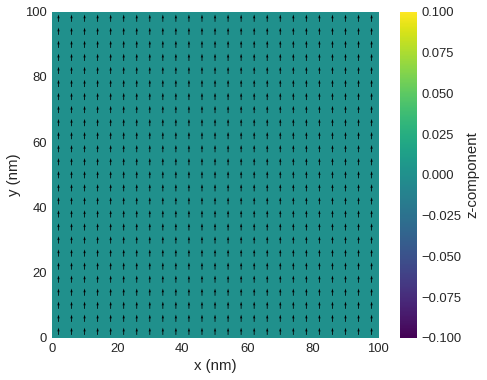

In [5]:
system.m.plane('z').mpl()

In [6]:
md = mc.MinDriver()

In [7]:
md.drive(system)

Running mumax3 (ExeMumax3Runner) [2022/04/21 13:17]... (0.6 s)


In [8]:
%load_ext line_profiler

In [9]:
%lprun -f md.drive md.drive(system)

Running mumax3 (ExeMumax3Runner) [2022/04/21 13:17]... (0.6 s)


Timer unit: 1e-06 s

Total time: 0.609576 s
File: /home/sam/repos/ubermag-devtools/repos/mumax3c/mumax3c/drivers/driver.py
Function: drive at line 42

Line #      Hits         Time  Per Hit   % Time  Line Contents
    42                                               def drive(
    43                                                   self,
    44                                                   system,
    45                                                   /,
    46                                                   dirname=".",
    47                                                   append=True,
    48                                                   fixed_subregions=None,
    49                                                   compute=None,
    50                                                   output_step=False,
    51                                                   n_threads=None,
    52                                                   runner=None,
    53                  